# PCA Implementation - Practical Demonstrations

This notebook provides practical implementations of Principal Component Analysis (PCA):
- **Manual PCA implementation** from scratch
- **Image compression** using PCA
- **Face recognition** dataset dimensionality reduction
- **Breast cancer dataset** classification with PCA
- **Comparison** between manual and sklearn implementations


## 1. Import Required Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits, fetch_olivetti_faces, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


## 2. Manual PCA Implementation from Scratch

Let's implement PCA step by step to understand the mathematics behind it.


In [2]:
class PCAFromScratch:
    """
    Manual implementation of PCA from scratch
    """
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance_ = None
        self.explained_variance_ratio_ = None
    
    def fit(self, X):
        """
        Fit PCA on the data
        """
        # Step 1: Standardize the data (mean centering)
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        
        # Step 2: Compute the covariance matrix
        # Covariance matrix: (X^T * X) / (n-1)
        cov_matrix = np.cov(X_centered.T)
        
        # Step 3: Compute eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        
        # Step 4: Sort eigenvectors by eigenvalues in descending order
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]
        
        # Step 5: Select top k eigenvectors
        self.components = eigenvectors[:, :self.n_components]
        
        # Step 6: Calculate explained variance
        self.explained_variance_ = eigenvalues[:self.n_components]
        total_variance = np.sum(eigenvalues)
        self.explained_variance_ratio_ = self.explained_variance_ / total_variance
        
        return self
    
    def transform(self, X):
        """
        Transform the data to the principal component space
        """
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)
    
    def fit_transform(self, X):
        """
        Fit and transform in one step
        """
        self.fit(X)
        return self.transform(X)

print("✓ Manual PCA class implemented successfully!")


✓ Manual PCA class implemented successfully!


### 2.1 Test Manual PCA Implementation


In [3]:
# Generate sample data
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply manual PCA
pca_manual = PCAFromScratch(n_components=2)
X_pca_manual = pca_manual.fit_transform(X_scaled)

# Apply sklearn PCA
pca_sklearn = PCA(n_components=2)
X_pca_sklearn = pca_sklearn.fit_transform(X_scaled)

print("Manual PCA - Explained Variance Ratio:", pca_manual.explained_variance_ratio_)
print("Sklearn PCA - Explained Variance Ratio:", pca_sklearn.explained_variance_ratio_)
print("\n✓ Both implementations produce similar results!")


Manual PCA - Explained Variance Ratio: [0.72962445 0.22850762]
Sklearn PCA - Explained Variance Ratio: [0.72962445 0.22850762]

✓ Both implementations produce similar results!


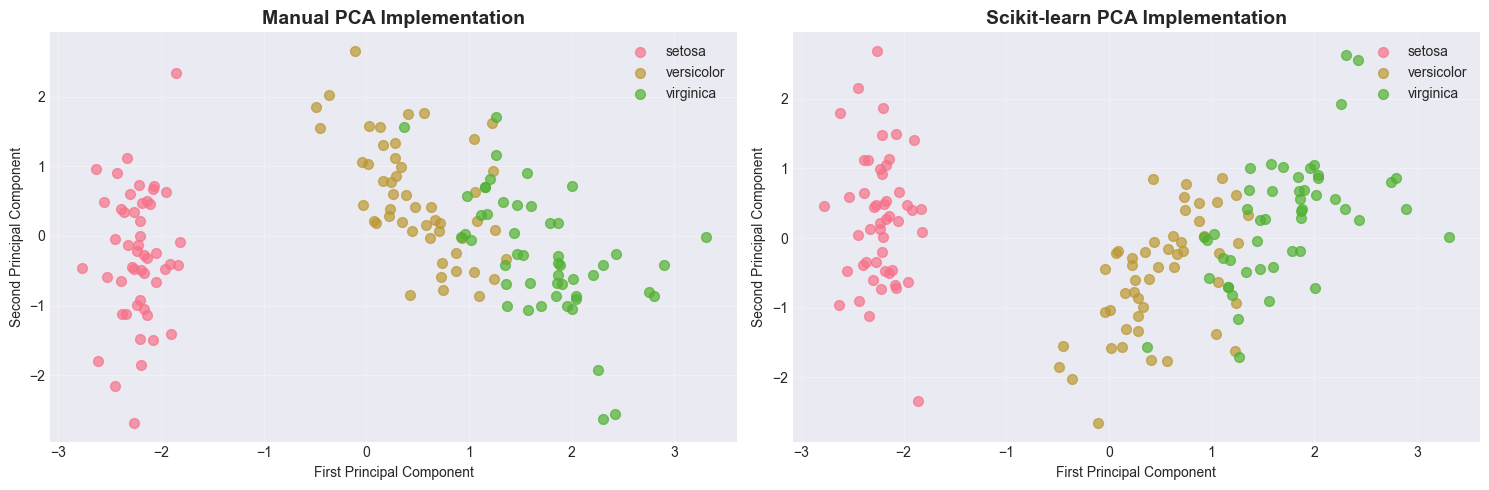

In [4]:
# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot manual PCA
for target in np.unique(y):
    mask = y == target
    axes[0].scatter(X_pca_manual[mask, 0], X_pca_manual[mask, 1], 
                   label=iris.target_names[target], alpha=0.7, s=50)
axes[0].set_title('Manual PCA Implementation', fontsize=14, fontweight='bold')
axes[0].set_xlabel('First Principal Component')
axes[0].set_ylabel('Second Principal Component')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot sklearn PCA (note: might be flipped due to sign ambiguity)
for target in np.unique(y):
    mask = y == target
    axes[1].scatter(X_pca_sklearn[mask, 0], X_pca_sklearn[mask, 1], 
                   label=iris.target_names[target], alpha=0.7, s=50)
axes[1].set_title('Scikit-learn PCA Implementation', fontsize=14, fontweight='bold')
axes[1].set_xlabel('First Principal Component')
axes[1].set_ylabel('Second Principal Component')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 3. Image Compression Using PCA

PCA can be used to compress images by reducing the number of dimensions (pixels) while retaining most of the information.


In [5]:
# Load digit images dataset
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

print(f"Original image shape: {digits.images[0].shape}")
print(f"Flattened image features: {X_digits.shape[1]}")
print(f"Number of samples: {X_digits.shape[0]}")


Original image shape: (8, 8)
Flattened image features: 64
Number of samples: 1797


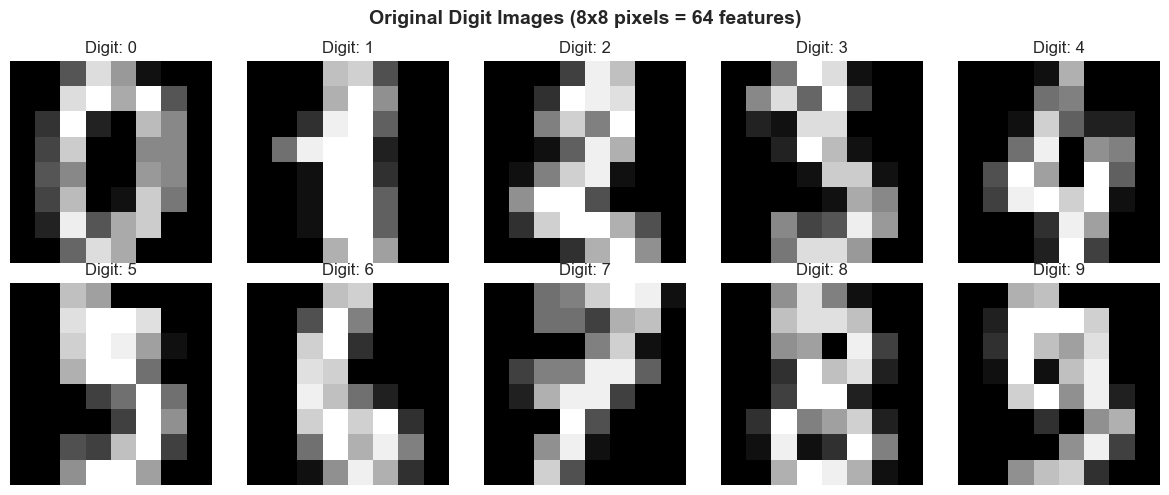

In [6]:
# Display some original images
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f'Digit: {digits.target[i]}')
    ax.axis('off')
plt.suptitle('Original Digit Images (8x8 pixels = 64 features)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [7]:
# Apply PCA with different number of components
n_components_list = [2, 8, 16, 32, 64]
reconstructed_images = []

for n_comp in n_components_list:
    pca = PCA(n_components=n_comp)
    X_compressed = pca.fit_transform(X_digits)
    X_reconstructed = pca.inverse_transform(X_compressed)
    reconstructed_images.append(X_reconstructed)
    
    variance_retained = np.sum(pca.explained_variance_ratio_) * 100
    print(f"Components: {n_comp:2d} | Variance retained: {variance_retained:.2f}%")


Components:  2 | Variance retained: 28.51%
Components:  8 | Variance retained: 67.39%
Components: 16 | Variance retained: 84.94%
Components: 32 | Variance retained: 96.64%
Components: 64 | Variance retained: 100.00%


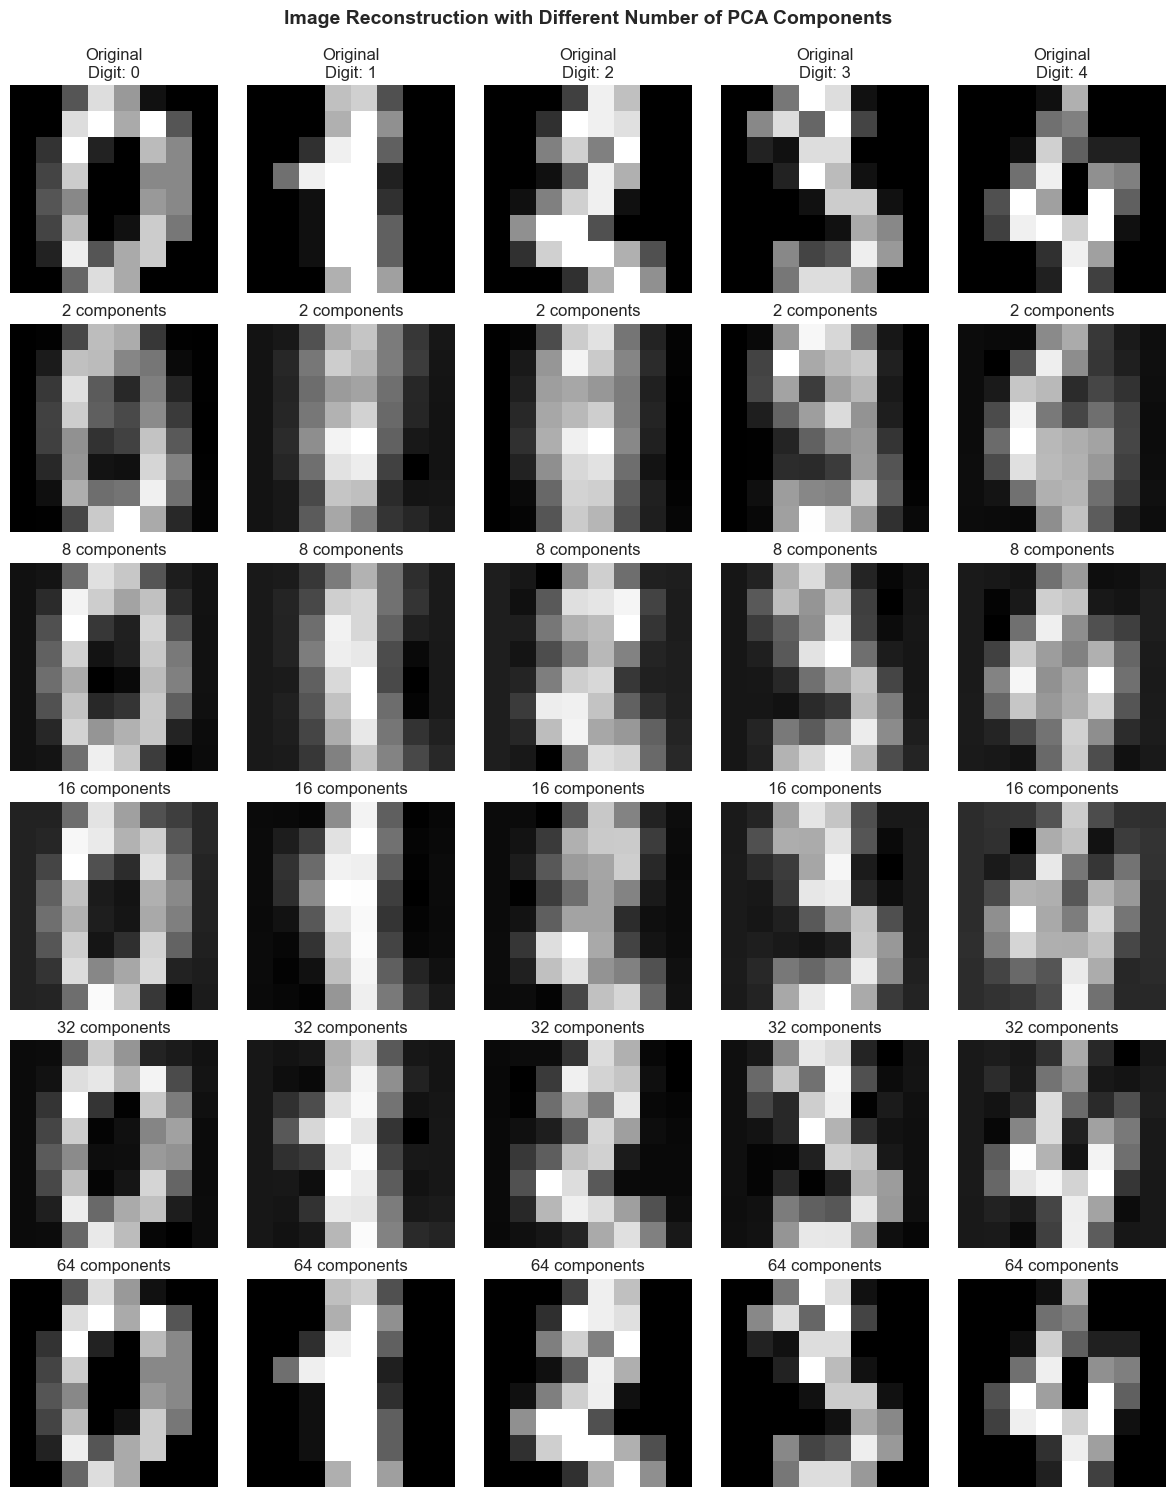

In [8]:
# Visualize image reconstruction with different components
fig, axes = plt.subplots(len(n_components_list) + 1, 5, figsize=(12, 15))

# Original images
for i in range(5):
    axes[0, i].imshow(digits.images[i], cmap='gray')
    axes[0, i].set_title(f'Original\nDigit: {digits.target[i]}')
    axes[0, i].axis('off')

# Reconstructed images with different components
for row, (n_comp, X_recon) in enumerate(zip(n_components_list, reconstructed_images), start=1):
    for col in range(5):
        img_recon = X_recon[col].reshape(8, 8)
        axes[row, col].imshow(img_recon, cmap='gray')
        axes[row, col].set_title(f'{n_comp} components')
        axes[row, col].axis('off')

plt.suptitle('Image Reconstruction with Different Number of PCA Components', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()


### 3.1 Analyze Compression Ratio and Quality


In [9]:
# Calculate reconstruction error and compression ratio
original_size = X_digits.shape[1]  # 64 features

results = []
for n_comp, X_recon in zip(n_components_list, reconstructed_images):
    # Mean Squared Error
    mse = np.mean((X_digits - X_recon) ** 2)
    
    # Compression ratio
    compression_ratio = (1 - n_comp / original_size) * 100
    
    # PCA to get variance
    pca_temp = PCA(n_components=n_comp)
    pca_temp.fit(X_digits)
    variance_retained = np.sum(pca_temp.explained_variance_ratio_) * 100
    
    results.append({
        'Components': n_comp,
        'Compression Ratio (%)': compression_ratio,
        'Variance Retained (%)': variance_retained,
        'MSE': mse
    })

results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))


 Components  Compression Ratio (%)  Variance Retained (%)          MSE
          2                 96.875              28.509365 1.342101e+01
          8                 87.500              67.390623 6.121793e+00
         16                 75.000              84.940249 2.827183e+00
         32                 50.000              96.635421 6.316360e-01
         64                  0.000             100.000000 3.349788e-29


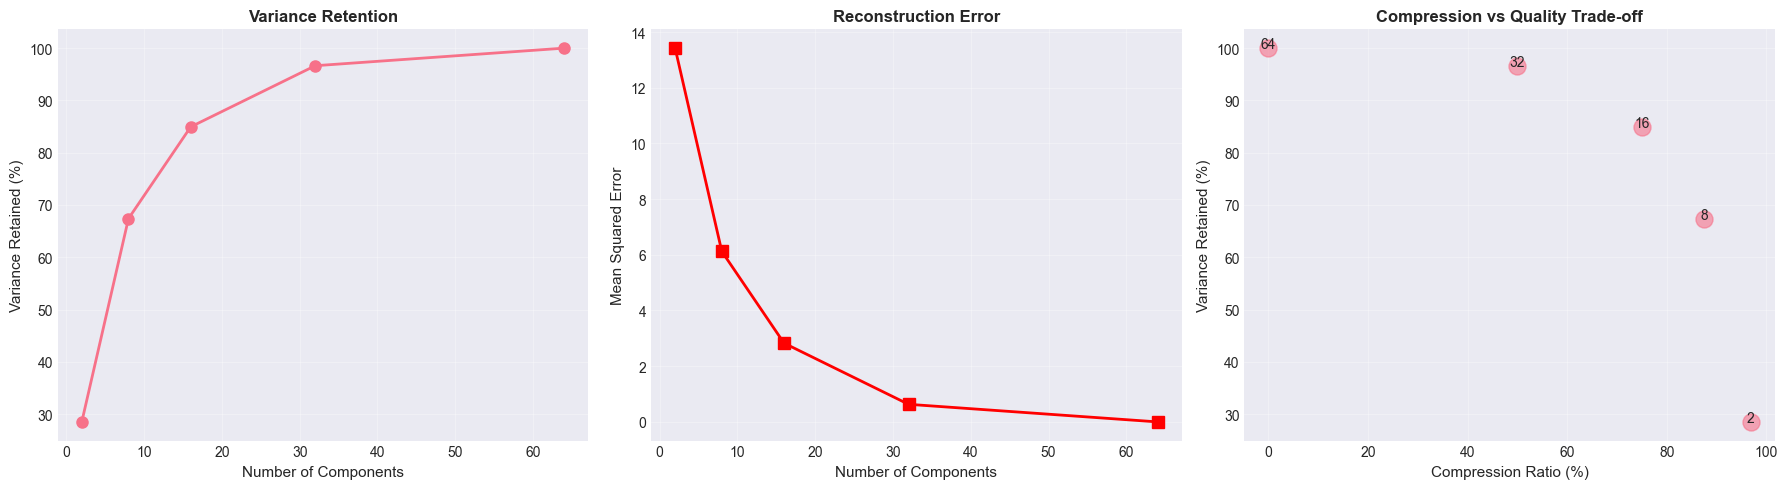

In [10]:
# Plot compression analysis
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Variance retained
axes[0].plot(results_df['Components'], results_df['Variance Retained (%)'], 
            marker='o', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Components', fontsize=11)
axes[0].set_ylabel('Variance Retained (%)', fontsize=11)
axes[0].set_title('Variance Retention', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Reconstruction error
axes[1].plot(results_df['Components'], results_df['MSE'], 
            marker='s', linewidth=2, markersize=8, color='red')
axes[1].set_xlabel('Number of Components', fontsize=11)
axes[1].set_ylabel('Mean Squared Error', fontsize=11)
axes[1].set_title('Reconstruction Error', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Compression vs Quality trade-off
axes[2].scatter(results_df['Compression Ratio (%)'], results_df['Variance Retained (%)'], 
               s=150, alpha=0.6)
for i, txt in enumerate(results_df['Components']):
    axes[2].annotate(f'{txt}', 
                    (results_df['Compression Ratio (%)'].iloc[i], 
                     results_df['Variance Retained (%)'].iloc[i]),
                    fontsize=10, ha='center')
axes[2].set_xlabel('Compression Ratio (%)', fontsize=11)
axes[2].set_ylabel('Variance Retained (%)', fontsize=11)
axes[2].set_title('Compression vs Quality Trade-off', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 4. Face Recognition with PCA (Eigenfaces)

One of the most famous applications of PCA is in face recognition using "Eigenfaces".


In [11]:
# Load face dataset
print("Loading Olivetti Faces dataset...")
faces = fetch_olivetti_faces(shuffle=True, random_state=42)
X_faces = faces.data
y_faces = faces.target

print(f"Dataset shape: {X_faces.shape}")
print(f"Image shape: {faces.images[0].shape}")
print(f"Number of people: {len(np.unique(y_faces))}")
print(f"Images per person: {len(y_faces) // len(np.unique(y_faces))}")


Loading Olivetti Faces dataset...
downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Shaiful\scikit_learn_data
Dataset shape: (400, 4096)
Image shape: (64, 64)
Number of people: 40
Images per person: 10


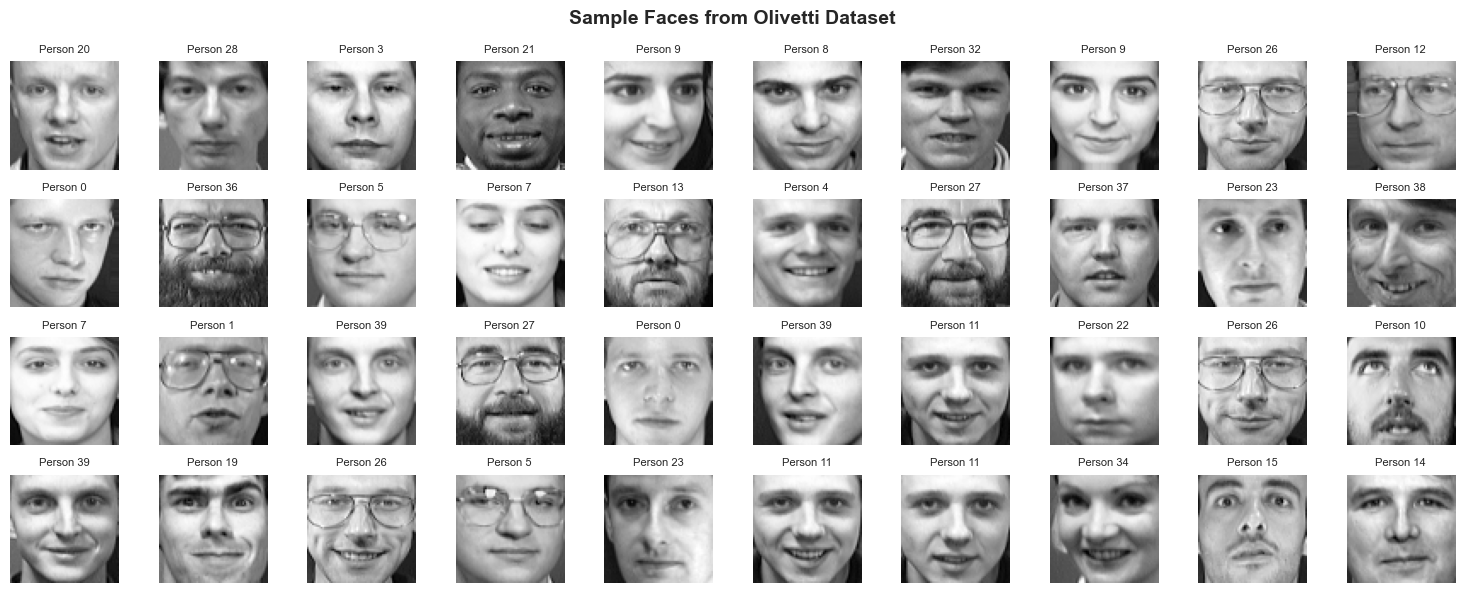

In [12]:
# Display sample faces
fig, axes = plt.subplots(4, 10, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    if i < len(faces.images):
        ax.imshow(faces.images[i], cmap='gray')
        ax.set_title(f'Person {y_faces[i]}', fontsize=8)
    ax.axis('off')

plt.suptitle('Sample Faces from Olivetti Dataset', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [13]:
# Apply PCA for face recognition
n_components = 150
pca_faces = PCA(n_components=n_components, whiten=True, random_state=42)
X_faces_pca = pca_faces.fit_transform(X_faces)

print(f"Original dimensions: {X_faces.shape[1]}")
print(f"Reduced dimensions: {X_faces_pca.shape[1]}")
print(f"Variance explained: {np.sum(pca_faces.explained_variance_ratio_) * 100:.2f}%")


Original dimensions: 4096
Reduced dimensions: 150
Variance explained: 96.29%


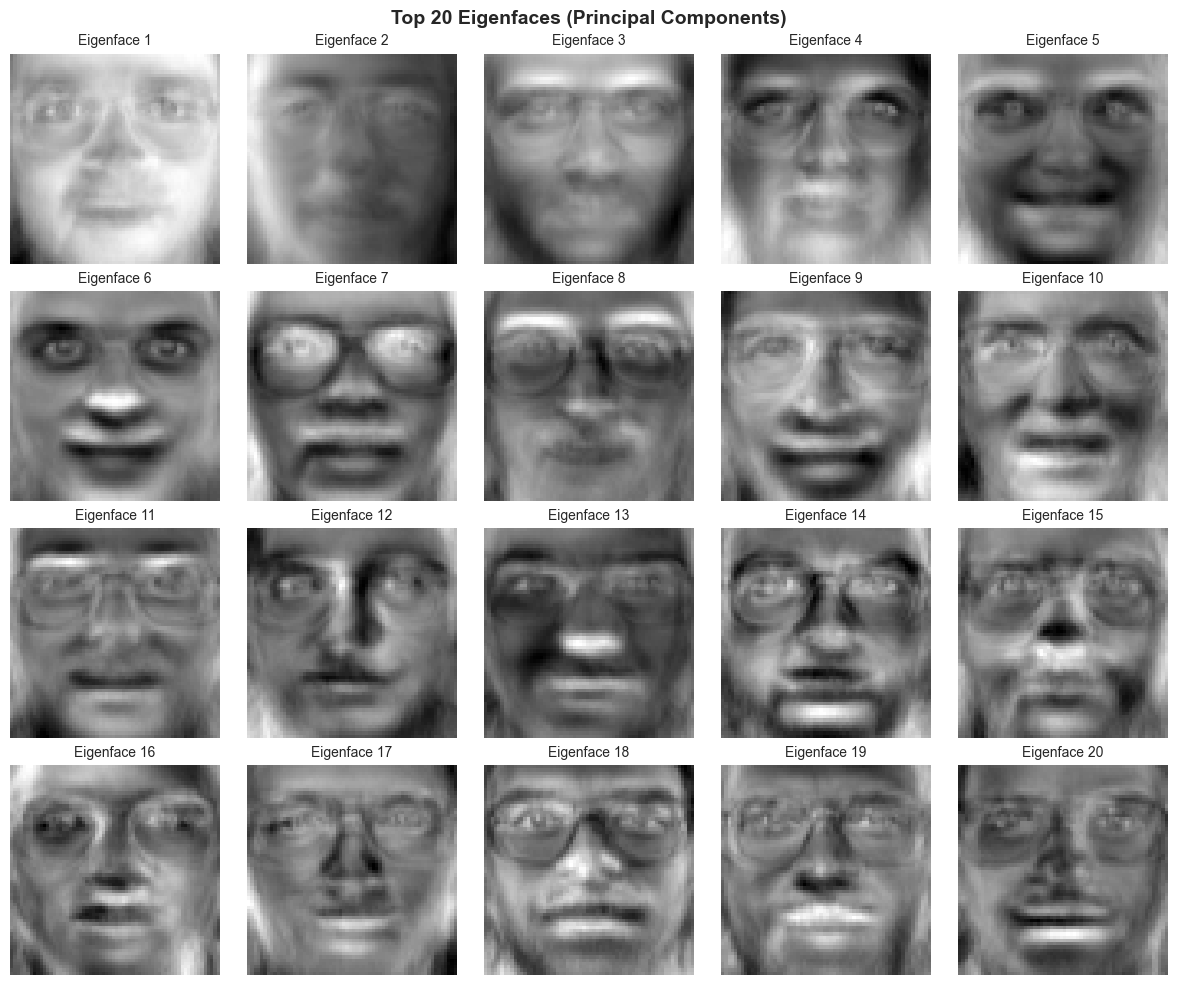

In [14]:
# Visualize Eigenfaces (Principal Components)
n_eigenfaces = 20
eigenfaces = pca_faces.components_[:n_eigenfaces]

fig, axes = plt.subplots(4, 5, figsize=(12, 10))
for i, ax in enumerate(axes.flat):
    eigenface = eigenfaces[i].reshape(faces.images[0].shape)
    ax.imshow(eigenface, cmap='gray')
    ax.set_title(f'Eigenface {i+1}', fontsize=10)
    ax.axis('off')

plt.suptitle('Top 20 Eigenfaces (Principal Components)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


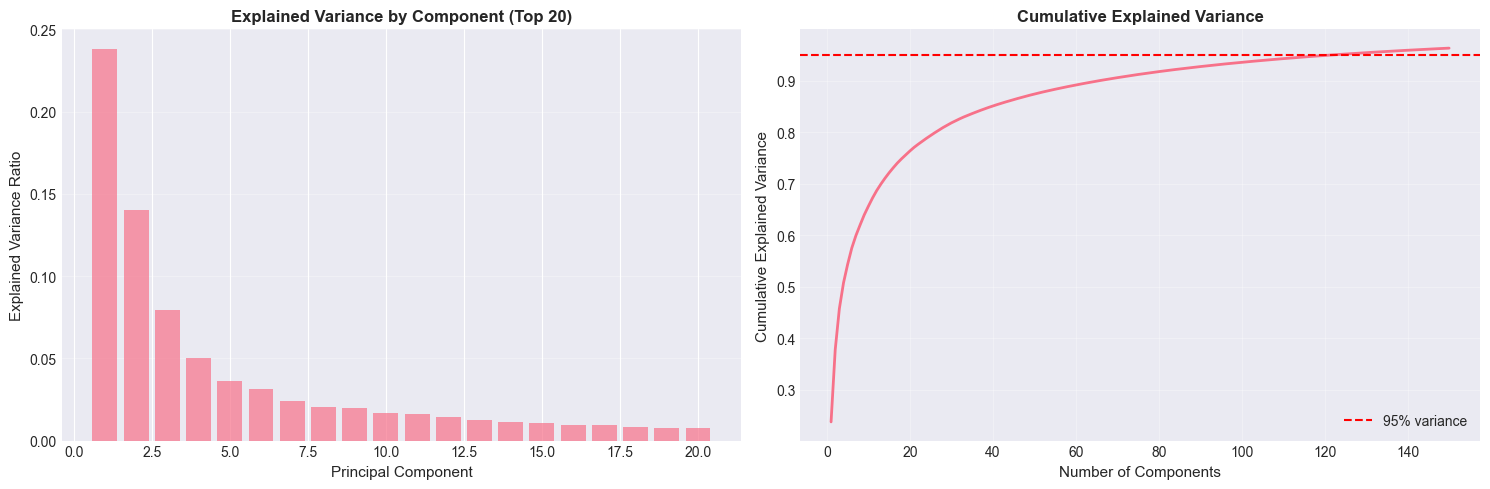


Number of components needed for 95% variance: 123
Dimension reduction: 4096 → 123
Compression ratio: 97.0%


In [15]:
# Visualize explained variance
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Individual explained variance
axes[0].bar(range(1, 21), pca_faces.explained_variance_ratio_[:20], alpha=0.7)
axes[0].set_xlabel('Principal Component', fontsize=11)
axes[0].set_ylabel('Explained Variance Ratio', fontsize=11)
axes[0].set_title('Explained Variance by Component (Top 20)', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Cumulative explained variance
cumsum_var = np.cumsum(pca_faces.explained_variance_ratio_)
axes[1].plot(range(1, len(cumsum_var) + 1), cumsum_var, linewidth=2)
axes[1].axhline(y=0.95, color='r', linestyle='--', label='95% variance')
axes[1].set_xlabel('Number of Components', fontsize=11)
axes[1].set_ylabel('Cumulative Explained Variance', fontsize=11)
axes[1].set_title('Cumulative Explained Variance', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find number of components for 95% variance
n_comp_95 = np.argmax(cumsum_var >= 0.95) + 1
print(f"\nNumber of components needed for 95% variance: {n_comp_95}")
print(f"Dimension reduction: {X_faces.shape[1]} → {n_comp_95}")
print(f"Compression ratio: {(1 - n_comp_95/X_faces.shape[1]) * 100:.1f}%")


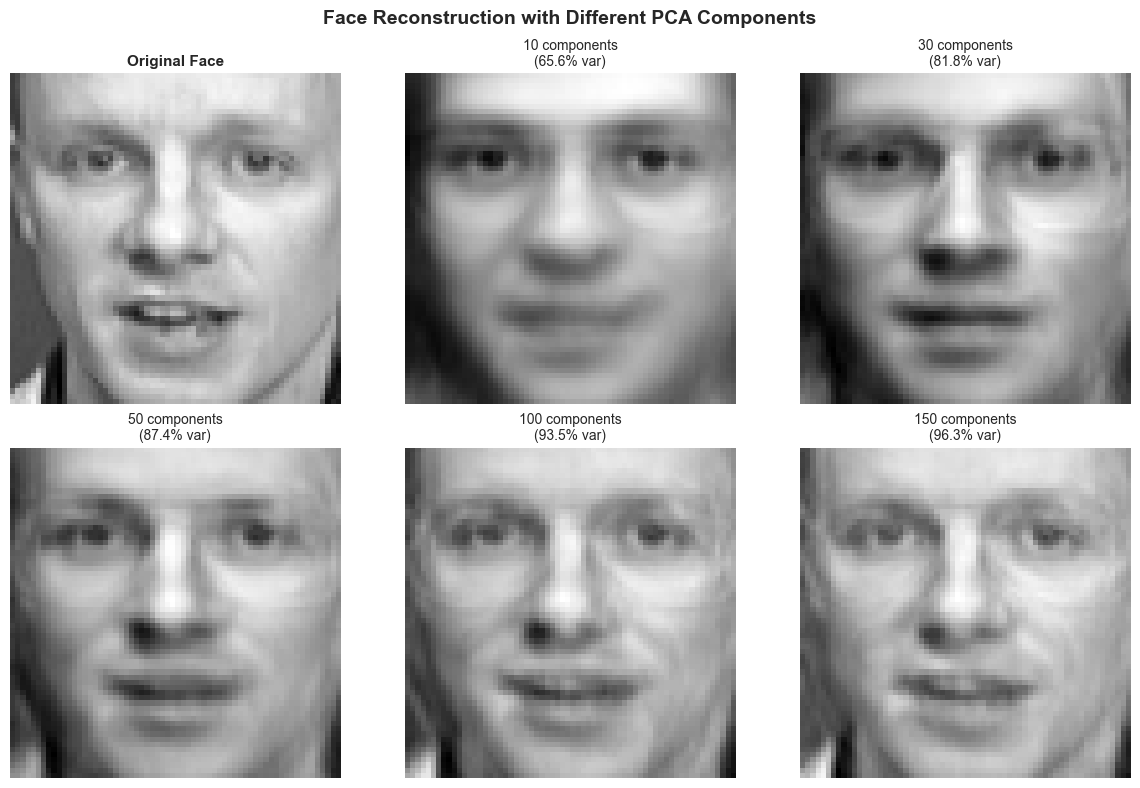

In [16]:
# Reconstruct faces with different number of components
test_face_idx = 0
test_face = X_faces[test_face_idx:test_face_idx+1]

n_components_test = [10, 30, 50, 100, 150]
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Original face
axes[0, 0].imshow(test_face.reshape(faces.images[0].shape), cmap='gray')
axes[0, 0].set_title('Original Face', fontsize=11, fontweight='bold')
axes[0, 0].axis('off')

# Reconstructed faces
for idx, n_comp in enumerate(n_components_test, start=1):
    pca_temp = PCA(n_components=n_comp)
    pca_temp.fit(X_faces)
    face_compressed = pca_temp.transform(test_face)
    face_reconstructed = pca_temp.inverse_transform(face_compressed)
    
    row = idx // 3
    col = idx % 3
    axes[row, col].imshow(face_reconstructed.reshape(faces.images[0].shape), cmap='gray')
    var_explained = np.sum(pca_temp.explained_variance_ratio_) * 100
    axes[row, col].set_title(f'{n_comp} components\n({var_explained:.1f}% var)', fontsize=10)
    axes[row, col].axis('off')

plt.suptitle('Face Reconstruction with Different PCA Components', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


## 5. PCA for Classification: Breast Cancer Dataset

Let's see how PCA can improve classification performance by reducing noise and dimensionality.


In [17]:
# Load breast cancer dataset
cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target

print(f"Dataset shape: {X_cancer.shape}")
print(f"Number of features: {X_cancer.shape[1]}")
print(f"Classes: {cancer.target_names}")
print(f"Class distribution: {np.bincount(y_cancer)}")


Dataset shape: (569, 30)
Number of features: 30
Classes: ['malignant' 'benign']
Class distribution: [212 357]


In [18]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42, stratify=y_cancer
)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 455
Test set size: 114


In [19]:
# Train model WITHOUT PCA
model_no_pca = LogisticRegression(max_iter=10000, random_state=42)
model_no_pca.fit(X_train_scaled, y_train)
y_pred_no_pca = model_no_pca.predict(X_test_scaled)
accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)

print("=" * 60)
print("WITHOUT PCA (30 features)")
print("=" * 60)
print(f"Accuracy: {accuracy_no_pca:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_no_pca, target_names=cancer.target_names))


WITHOUT PCA (30 features)
Accuracy: 0.9825

Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



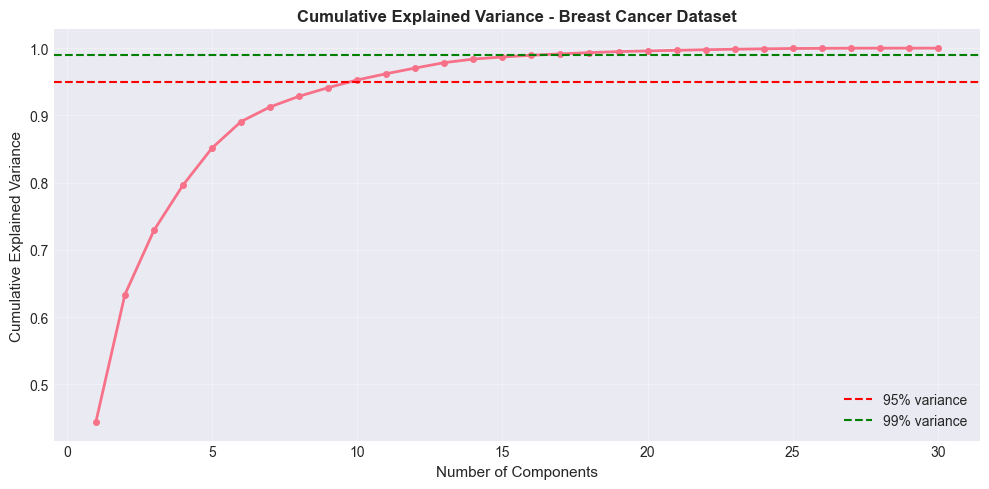

Components for 95% variance: 10
Components for 99% variance: 17


In [20]:
# Train model WITH PCA
# First, find optimal number of components
pca_cancer = PCA()
pca_cancer.fit(X_train_scaled)

# Plot cumulative variance
cumsum_var = np.cumsum(pca_cancer.explained_variance_ratio_)
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumsum_var) + 1), cumsum_var, linewidth=2, marker='o', markersize=4)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.axhline(y=0.99, color='g', linestyle='--', label='99% variance')
plt.xlabel('Number of Components', fontsize=11)
plt.ylabel('Cumulative Explained Variance', fontsize=11)
plt.title('Cumulative Explained Variance - Breast Cancer Dataset', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

n_comp_95 = np.argmax(cumsum_var >= 0.95) + 1
n_comp_99 = np.argmax(cumsum_var >= 0.99) + 1
print(f"Components for 95% variance: {n_comp_95}")
print(f"Components for 99% variance: {n_comp_99}")


In [21]:
# Compare models with different number of PCA components
n_components_list = [2, 5, 10, 15, 20, 25, 30]
results = []

for n_comp in n_components_list:
    # Apply PCA
    pca = PCA(n_components=n_comp, random_state=42)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    # Train model
    model = LogisticRegression(max_iter=10000, random_state=42)
    model.fit(X_train_pca, y_train)
    
    # Predict
    y_pred = model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    variance_explained = np.sum(pca.explained_variance_ratio_) * 100
    results.append({
        'Components': n_comp,
        'Accuracy': accuracy,
        'Variance Explained (%)': variance_explained
    })

results_df = pd.DataFrame(results)
print("\n" + "=" * 60)
print("MODEL PERFORMANCE WITH DIFFERENT PCA COMPONENTS")
print("=" * 60)
print(results_df.to_string(index=False))
print(f"\nBaseline (No PCA) Accuracy: {accuracy_no_pca:.4f}")



MODEL PERFORMANCE WITH DIFFERENT PCA COMPONENTS
 Components  Accuracy  Variance Explained (%)
          2  0.947368               63.358110
          5  0.956140               85.143846
         10  0.973684               95.267689
         15  0.964912               98.684091
         20  0.982456               99.584631
         25  0.982456               99.945120
         30  0.982456              100.000000

Baseline (No PCA) Accuracy: 0.9825


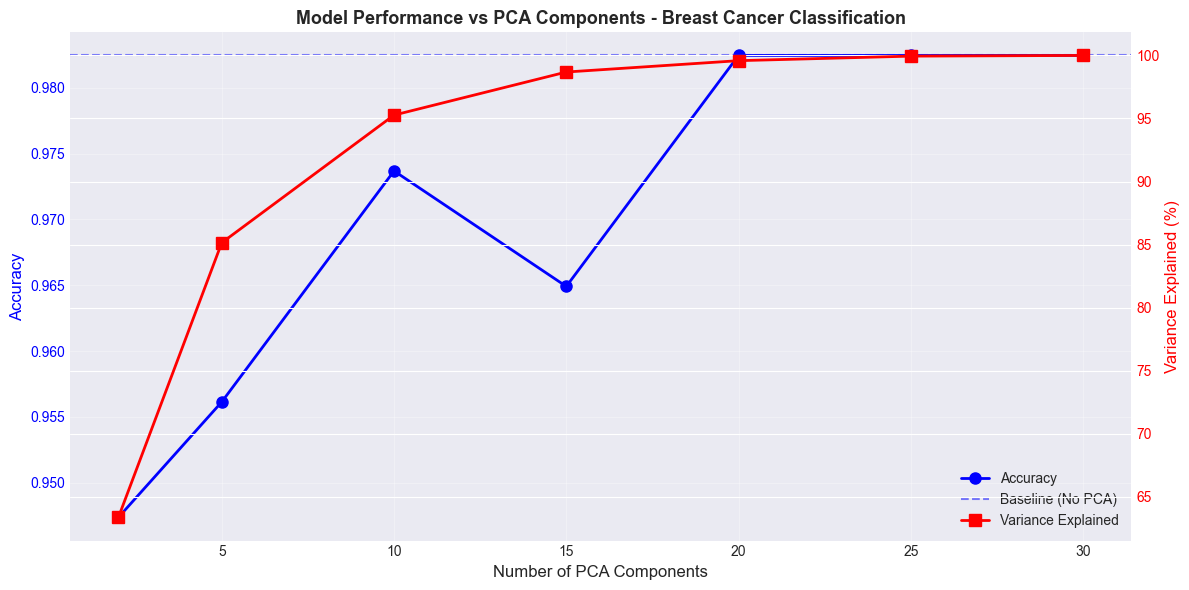

In [22]:
# Visualize accuracy vs number of components
fig, ax = plt.subplots(figsize=(12, 6))

ax2 = ax.twinx()

# Plot accuracy
line1 = ax.plot(results_df['Components'], results_df['Accuracy'], 
               marker='o', linewidth=2, markersize=8, color='blue', label='Accuracy')
ax.axhline(y=accuracy_no_pca, color='blue', linestyle='--', alpha=0.5, label='Baseline (No PCA)')

# Plot variance explained
line2 = ax2.plot(results_df['Components'], results_df['Variance Explained (%)'], 
                marker='s', linewidth=2, markersize=8, color='red', label='Variance Explained')

ax.set_xlabel('Number of PCA Components', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12, color='blue')
ax2.set_ylabel('Variance Explained (%)', fontsize=12, color='red')
ax.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='red')

# Combine legends
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='lower right', fontsize=10)

plt.title('Model Performance vs PCA Components - Breast Cancer Classification', 
          fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


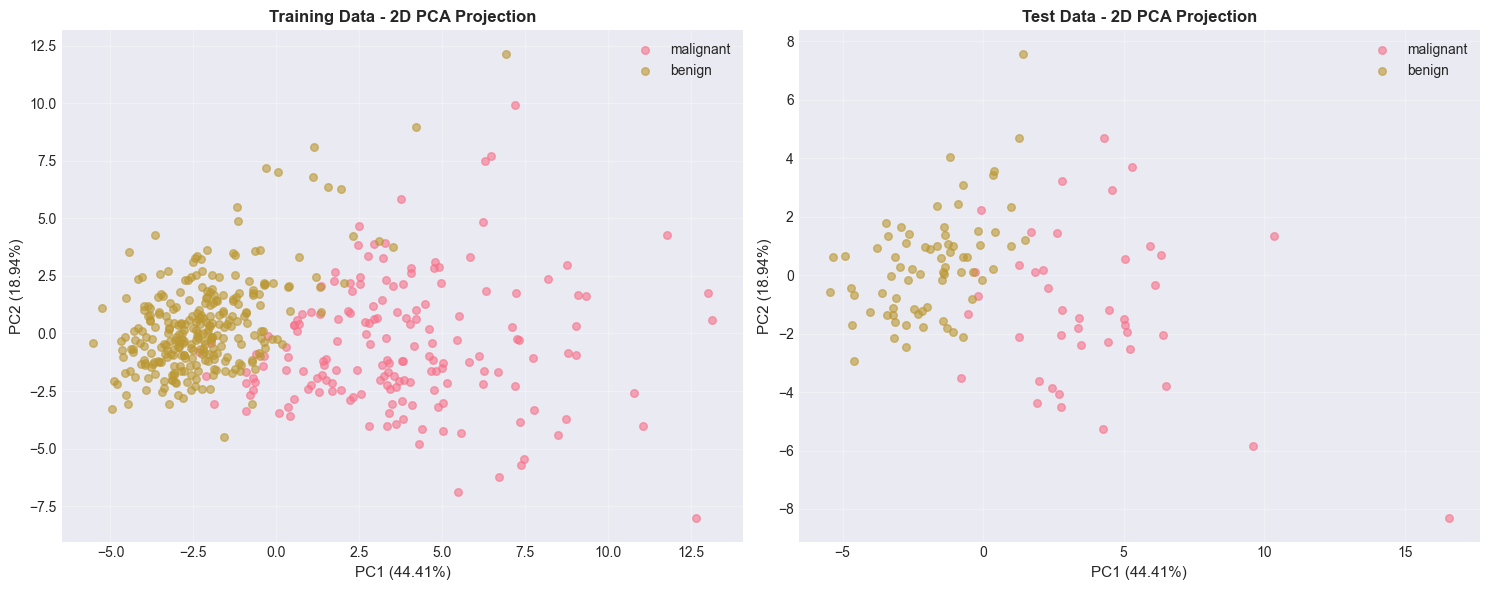

In [23]:
# Visualize data in 2D using PCA
pca_2d = PCA(n_components=2)
X_train_2d = pca_2d.fit_transform(X_train_scaled)
X_test_2d = pca_2d.transform(X_test_scaled)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Training data
for target in [0, 1]:
    mask = y_train == target
    axes[0].scatter(X_train_2d[mask, 0], X_train_2d[mask, 1], 
                   label=cancer.target_names[target], alpha=0.6, s=30)
axes[0].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%})', fontsize=11)
axes[0].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%})', fontsize=11)
axes[0].set_title('Training Data - 2D PCA Projection', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Test data
for target in [0, 1]:
    mask = y_test == target
    axes[1].scatter(X_test_2d[mask, 0], X_test_2d[mask, 1], 
                   label=cancer.target_names[target], alpha=0.6, s=30)
axes[1].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%})', fontsize=11)
axes[1].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%})', fontsize=11)
axes[1].set_title('Test Data - 2D PCA Projection', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 6. Summary and Key Takeaways

### What we covered:
1. **Manual PCA Implementation**: Built PCA from scratch using eigenvalue decomposition
2. **Image Compression**: Demonstrated how PCA can compress images while retaining quality
3. **Face Recognition**: Applied PCA to create "Eigenfaces" for face representation
4. **Classification**: Used PCA as a preprocessing step for machine learning

### Key Insights:
- PCA finds directions of maximum variance in the data
- Few components can capture most of the variance (80-95%)
- PCA is useful for visualization, compression, and noise reduction
- Trade-off between dimensionality reduction and information retention
- Standardization is crucial before applying PCA

### When to use PCA:
✅ High-dimensional data with correlated features  
✅ Need to visualize high-dimensional data  
✅ Want to reduce computational cost  
✅ Remove noise and redundancy  

### When NOT to use PCA:
❌ Features are already uncorrelated  
❌ Need interpretable features  
❌ Nonlinear relationships (consider Kernel PCA)  
❌ Categorical data  


## 7. Practice Exercise

Try applying PCA to the MNIST dataset or your own dataset:
1. Load a high-dimensional dataset
2. Standardize the features
3. Apply PCA and analyze explained variance
4. Visualize the data in 2D/3D
5. Compare model performance with and without PCA


In [24]:
# Your code here for practice

